In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
n = len(train)
train.shape

(891, 12)

In [5]:
train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.isna().sum() / train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
train.isna().sum() / train.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

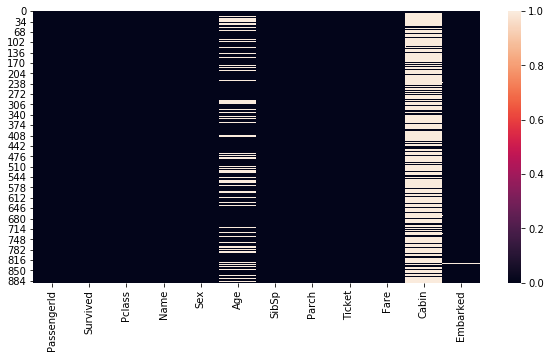

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(train.isna())

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jensen, Mr. Niels Peder",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train.describe(include=['int64'])

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [10]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

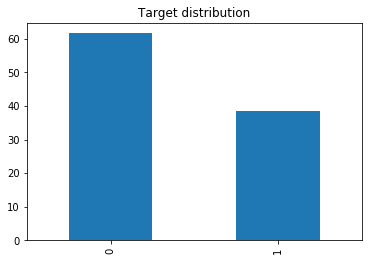

In [11]:
(train.Survived.value_counts() / train.shape[0] * 100).plot.bar(title='Target distribution')

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

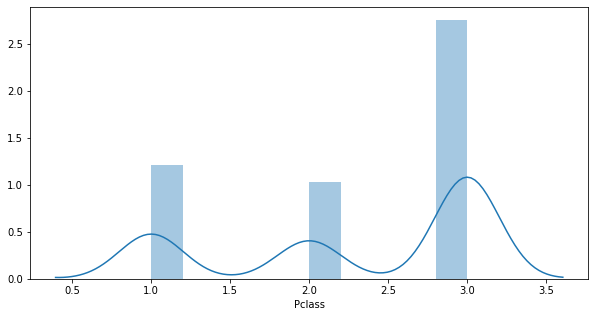

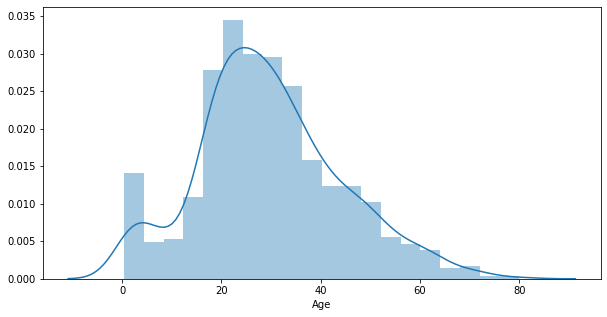

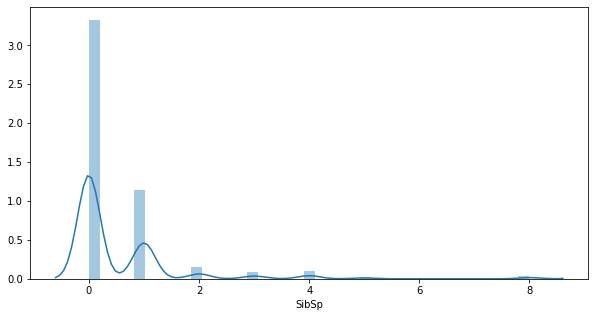

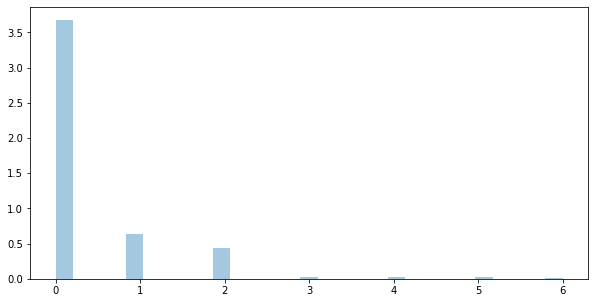

In [12]:

quantitative_col = [ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']

for col in quantitative_col :
    plt.figure(figsize=(10, 5))
    sns.distplot(train[col])

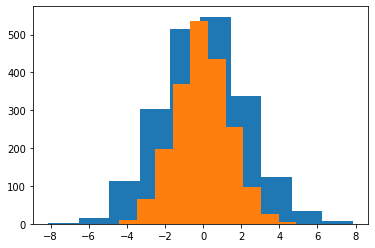

In [18]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    #plt.hist(data[col], normed=True, alpha=0.9)
    plt.hist(data[col])

In [92]:
train.select_dtypes('object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [2]:
qualitative_col = ['Sex', 'Ticket', 'Cabin', 'Embarked']

for col in qualitative_col :
    print(f'{col :-<50} {train[col].unique()}')

NameError: name 'train' is not defined

In [94]:
train.drop('PassengerId', axis = 1, inplace = True)

In [95]:
# color palette from seaborn
cm = sns.light_palette("green", as_cmap=True)
 
# Visualizing the DataFrame with set precision
train.corr().style.background_gradient(cmap=cm).set_precision(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


In [96]:
survived_people = train[train.Survived == 1]
unsurvived_people = train[train.Survived == 0]

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

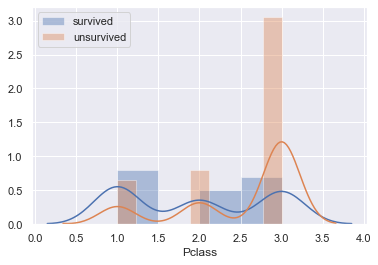

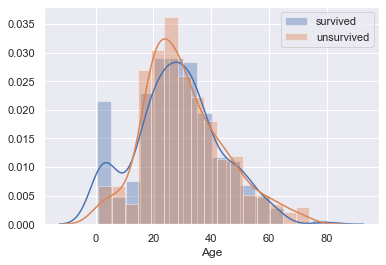

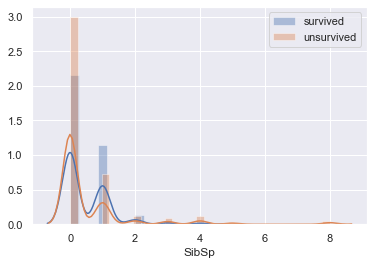

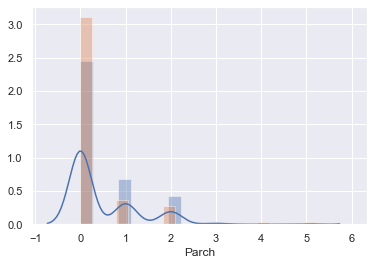

In [97]:
for col in quantitative_col :
    plt.figure()
    sns.distplot(survived_people[col], label='survived')
    sns.distplot(unsurvived_people[col], label='unsurvived')
    plt.legend()

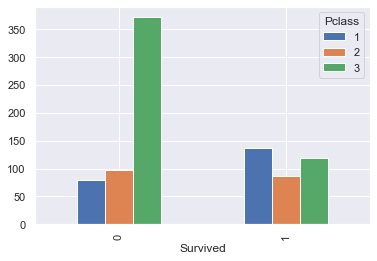

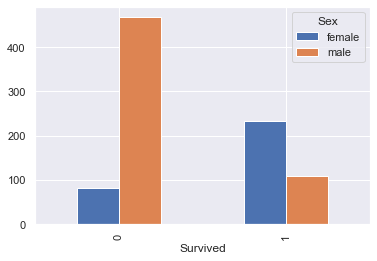

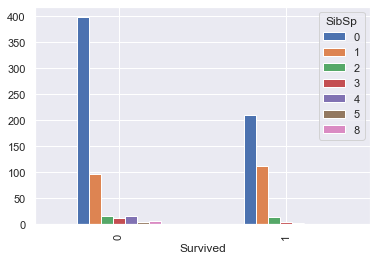

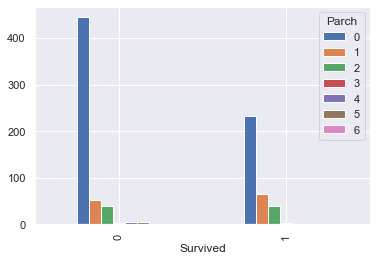

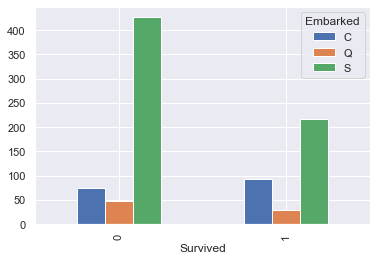

In [98]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] :
    pd.crosstab(train['Survived'], train[col]).plot.bar()

[ 0.12709313  0.48665716 -1.11057016 -0.26828903 -1.0968382   1.30892561
  0.47744657  1.166847   -0.39108176  2.4346947 ]


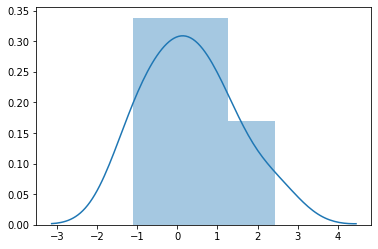

In [45]:
x = np.random.normal(size=10)
#if x < 0:
print(x)
x = sns.distplot(x)

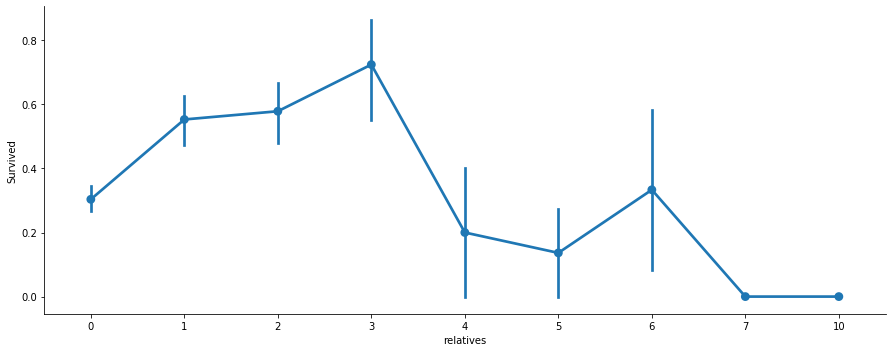

In [46]:
data = [train, test]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

In [47]:
df = train.append(test).reset_index(drop=True)

In [48]:
for i in range(len(df)):
    if not(pd.isnull(df['Cabin'].iloc[i])):
        df['Cabin'].iloc[i]=df['Cabin'].iloc[i][0] 
    else :
        df['Cabin'].iloc[i]='No'

In [49]:
df['Fsize'] = df['Parch'] + df['SibSp'] + 1